# Prepare data

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab 
from datetime import datetime, timedelta
import numpy as np
from fastai.collab import *
from fastai.tabular.all import *
from time import *

## Train and valid set

In [40]:
data = pd.read_csv(r'./charge_hourly_with_Covid_new.csv')

In [41]:
data

,Time,Energy_kWh,weekday,hour,hols,is_hol,measure,E_1,E_2,E_3
0,2020-12-02 09:00:00,4.214567,2,9,NaN,False,3.0,NaN,NaN,NaN
1,2020-12-02 10:00:00,0.560625,2,10,NaN,False,3.0,4.214567,NaN,NaN
2,2020-12-02 11:00:00,0.000000,2,11,NaN,False,3.0,0.560625,4.214567,NaN
3,2020-12-02 12:00:00,0.000000,2,12,NaN,False,3.0,0.000000,0.560625,4.214567
4,2020-12-02 13:00:00,0.000558,2,13,NaN,False,3.0,0.000000,0.000000,0.560625
...,...,...,...,...,...,...,...,...,...,...
10883,2022-02-28 20:00:00,0.000000,0,20,Spring holiday,True,0.0,0.000000,0.000000,0.000925
10884,2022-02-28 21:00:00,0.000000,0,21,Spring holiday,True,0.0,0.000000,0.000000,0.000000
10885,2022-02-28 22:00:00,0.000000,0,22,Spring holiday,True,0.0,0.000000,0.000000,0.000000
10886,2022-02-28 23:00:00,0.000000,0,23,Spring holiday,True,0.0,0.000000,0.000000,0.000000


In [42]:
df = data.drop(['Time', 'hols'], axis=1)
df

,Energy_kWh,weekday,hour,is_hol,measure,E_1,E_2,E_3
0,4.214567,2,9,False,3.0,NaN,NaN,NaN
1,0.560625,2,10,False,3.0,4.214567,NaN,NaN
2,0.000000,2,11,False,3.0,0.560625,4.214567,NaN
3,0.000000,2,12,False,3.0,0.000000,0.560625,4.214567
4,0.000558,2,13,False,3.0,0.000000,0.000000,0.560625
...,...,...,...,...,...,...,...,...
10883,0.000000,0,20,True,0.0,0.000000,0.000000,0.000925
10884,0.000000,0,21,True,0.0,0.000000,0.000000,0.000000
10885,0.000000,0,22,True,0.0,0.000000,0.000000,0.000000
10886,0.000000,0,23,True,0.0,0.000000,0.000000,0.000000


In [43]:
df.loc[:, 'measure'] = df['measure'].astype(int)

In [44]:
#df.drop(['E_2','E_3'], axis=1, inplace=True)
#df.drop(['measure'], axis=1, inplace=True)
df = df.iloc[3:,:]

In [45]:
df

,Energy_kWh,weekday,hour,is_hol,measure,E_1,E_2,E_3
3,0.000000,2,12,False,3,0.000000,0.560625,4.214567
4,0.000558,2,13,False,3,0.000000,0.000000,0.560625
5,0.000000,2,14,False,3,0.000558,0.000000,0.000000
6,0.000000,2,15,False,3,0.000000,0.000558,0.000000
7,0.000000,2,16,False,3,0.000000,0.000000,0.000558
...,...,...,...,...,...,...,...,...
10883,0.000000,0,20,True,0,0.000000,0.000000,0.000925
10884,0.000000,0,21,True,0,0.000000,0.000000,0.000000
10885,0.000000,0,22,True,0,0.000000,0.000000,0.000000
10886,0.000000,0,23,True,0,0.000000,0.000000,0.000000


In [46]:
cont_df,cat_df = cont_cat_split(df, max_card = 25, dep_var = 'Energy_kWh')

In [47]:
cat_df

['weekday', 'hour', 'is_hol', 'measure']

In [48]:
cont_df

['E_1', 'E_2', 'E_3']

In [49]:
procs_nn = [Categorify, Normalize]
splits = RandomSplitter(0.2)(range_of(df))
to_dt = TabularPandas(df, procs_nn, cat_df, cont_df, splits=splits, y_names='Energy_kWh')

In [50]:
xs,y = to_dt.train.xs, to_dt.train.y
valid_xs, valid_y = to_dt.valid.xs, to_dt.valid.y

## Test set

In [51]:
data_test = pd.read_csv(r'./charge0422_hourly_with_Covid_new.csv')

In [52]:
df_test = data_test.drop(['Time', 'hols'], axis=1)

In [53]:
df_test.loc[:, 'measure'] = df_test['measure'].astype(int)

#df_test.loc[:, 'measure'] = 0

#df_test.drop(['E_2','E_3'], axis=1, inplace=True)
#df_test.drop(['E_1'], axis=1, inplace=True)
#df_test.drop(['E_3'], axis=1, inplace=True)
#df_test.drop(['measure'], axis=1, inplace=True)
df_test

,Energy_kWh,weekday,hour,is_hol,measure,E_1,E_2,E_3
0,0.000000,1,4,True,0,0.000000,0.000000,0.0
1,0.000000,1,5,True,0,0.000000,0.000000,0.0
2,0.044108,1,6,True,0,0.000000,0.000000,0.0
3,7.013325,1,7,True,0,0.044108,0.000000,0.0
4,7.089000,1,8,True,0,7.013325,0.044108,0.0
...,...,...,...,...,...,...,...,...
647,0.000000,0,3,False,0,0.000000,0.000000,0.0
648,0.000000,0,4,False,0,0.000000,0.000000,0.0
649,0.000000,0,5,False,0,0.000000,0.000000,0.0
650,15.496425,0,6,False,0,0.000000,0.000000,0.0


In [54]:
cont_df_test,cat_df_test = cont_cat_split(df_test, max_card = 25, dep_var = 'Energy_kWh')

In [55]:
cat_df_test

['weekday', 'hour', 'is_hol', 'measure']

In [56]:
rocs_nn = [Categorify, Normalize]
to_test = TabularPandas(df_test, procs_nn, cat_df_test, cont_df_test, y_names='Energy_kWh')

In [57]:
test_xs,test_y = to_test.train.xs, to_test.train.y

# Tree regression with sklearn

In [58]:
from sklearn import tree

m = tree.DecisionTreeRegressor(min_samples_leaf=28)
m.fit(xs,y)

DecisionTreeRegressor(min_samples_leaf=28)

In [59]:
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

In [60]:
m_rmse(m, xs, y)

1.675094

In [61]:
m_rmse(m, valid_xs, valid_y)

1.86633

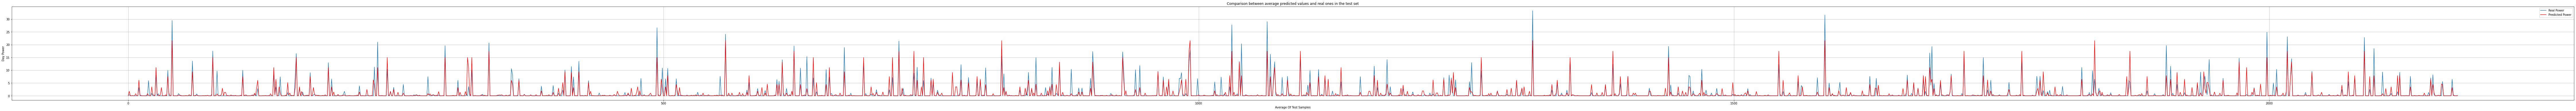

In [62]:
plt.figure(figsize=(160,6))
plt.plot(range(len(valid_y)), valid_y)
plt.plot(range(len(m.predict(valid_xs))), m.predict(valid_xs), 'r')
plt.title('Comparison between average predicted values and real ones in the test set')
plt.ylabel('Day Power')
plt.xlabel('Average Of Test Samples')
plt.legend(['Real Power', 'Predicted Power'])
plt.grid()
plt.show()

In [63]:
m_rmse(m, test_xs, test_y)

3.507742

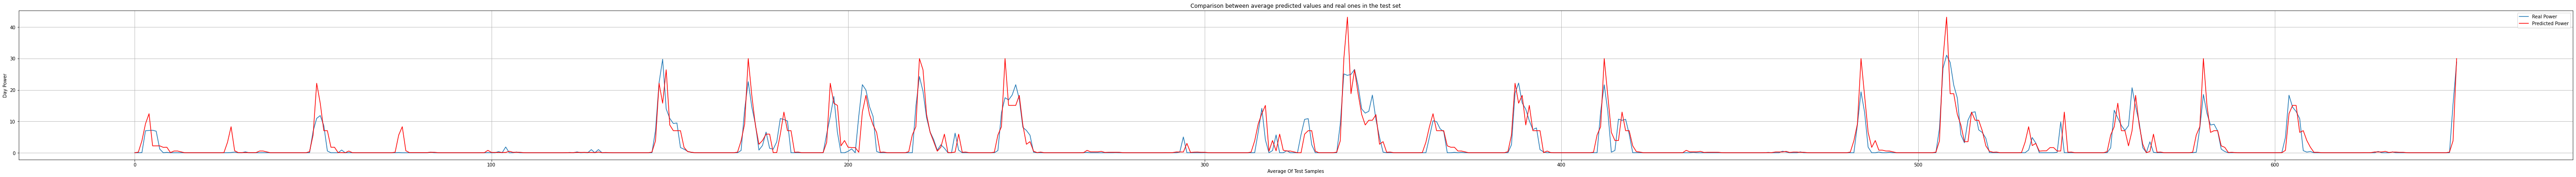

In [64]:
plt.figure(figsize=(100,6))
plt.plot(range(len(test_y)), test_y)
plt.plot(range(len(test_xs)), 2*m.predict(test_xs), 'r')
plt.title('Comparison between average predicted values and real ones in the test set')
plt.ylabel('Day Power')
plt.xlabel('Average Of Test Samples')
plt.legend(['Real Power', 'Predicted Power'])
plt.grid()
plt.show()

# Random forest with fastai

In [65]:
from sklearn import ensemble

def rf(xs, y, n_estimators=100, max_samples=500, max_features=0.5, min_samples_leaf=5, **kwargs):
    return ensemble.RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators, max_samples=max_samples,
                                max_features=max_features, min_samples_leaf=min_samples_leaf,
                                oob_score=True).fit(xs, y)

In [66]:
trees = rf(xs, y)

In [67]:
m_rmse(trees, xs, y)

1.879792

In [68]:
m_rmse(trees, valid_xs, valid_y)

1.996868

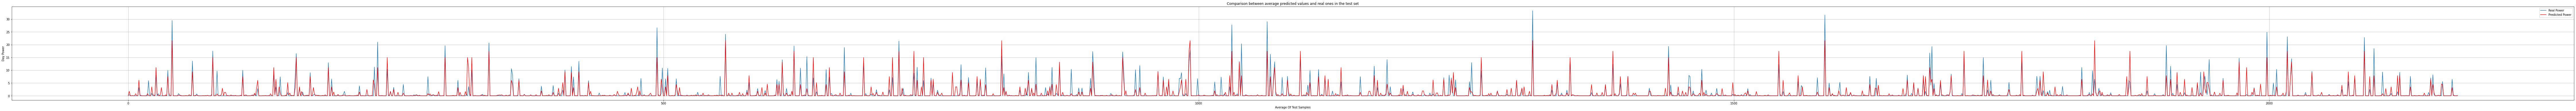

In [69]:
plt.figure(figsize=(160,6))
plt.plot(range(len(valid_y)), valid_y)
plt.plot(range(len(m.predict(valid_xs))), m.predict(valid_xs), 'r')
plt.title('Comparison between average predicted values and real ones in the test set')
plt.ylabel('Day Power')
plt.xlabel('Average Of Test Samples')
plt.legend(['Real Power', 'Predicted Power'])
plt.grid()
plt.show()

In [70]:
m_rmse(m, test_xs, test_y)

3.507742

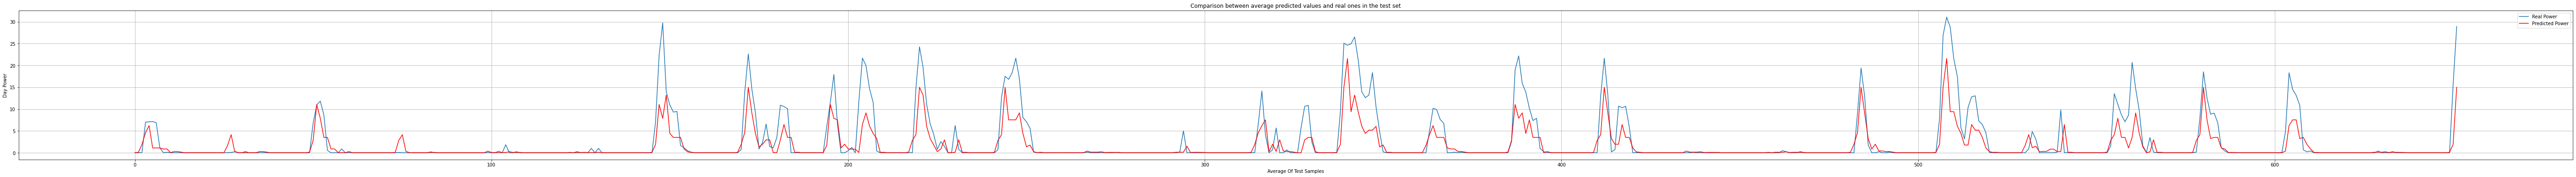

In [71]:
plt.figure(figsize=(100,6))
plt.plot(range(len(test_y)), test_y)
plt.plot(range(len(test_xs)), m.predict(test_xs), 'r')
plt.title('Comparison between average predicted values and real ones in the test set')
plt.ylabel('Day Power')
plt.xlabel('Average Of Test Samples')
plt.legend(['Real Power', 'Predicted Power'])
plt.grid()
plt.show()